In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_excel('weight_price.xlsx',  sheet_name='Sheet1')
df.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [4]:
x = df['weight']
y = df['price']

x.head()

0    2
1    4
2    5
3    3
4    6
Name: weight, dtype: int64

In [5]:
y.head()

0    35
1    60
2    20
3    50
4    50
Name: price, dtype: int64

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

mean_x

4.571428571428571

In [7]:
mean_y

47.142857142857146

In [8]:
dev_x = x - mean_x
dev_y = y - mean_y

dev_x.head()

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
Name: weight, dtype: float64

In [9]:
dev_y.head()

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
Name: price, dtype: float64

In [10]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
m

2.620967741935484

In [11]:
c = mean_y - m * mean_x
c

35.16129032258065

In [12]:
print(f"Slope (m) = {m}")
print(f"Intercept (c) = {c}")
reg = LinearRegression()

reg.fit(df[['weight']], y)

print(reg.coef_)
reg.intercept_

Slope (m) = 2.620967741935484
Intercept (c) = 35.16129032258065
[2.62096774]


35.16129032258065

In [13]:
v_weight = float(input('Enter vegetable weight: '))
predict_price = m * v_weight + c

predict_price

113.79032258064515

In [14]:
reg = LinearRegression()

reg.fit(df[['weight']], y)

reg.coef_

array([2.62096774])

In [15]:
# reg.intercept_

In [16]:
reg.predict([[6]])

array([50.88709677])

Text(0.5, 1.0, 'weight-price visualization')

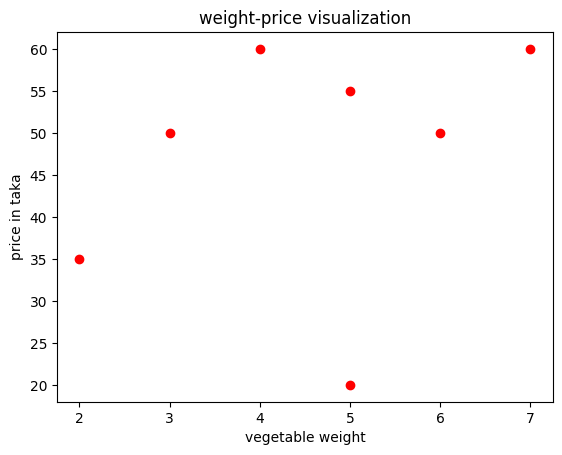

In [17]:
plt.scatter(x, y, color='red')
plt.xlabel('vegetable weight')
plt.ylabel('price in taka')
plt.title('weight-price visualization')